In [1]:
# -------------------------------------------
# Deliverable 1: Data Collection, Cleaning, and Exploration
# Dataset: Bike Sharing (UCI Repository)
# -------------------------------------------

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure visualization style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

-------------------------------------------
## 1. Dataset Description
-------------------------------------------
The Bike Sharing Dataset contains daily and hourly rental data spanning two years (2011–2012).
Attributes include season, weather conditions, holidays, temperature, humidity, and windspeed.
Target variables: casual, registered, and cnt (total rentals).

### Why this dataset is appropriate:
- 17,000 records (hourly) with 16 attributes -> satisfies project requirements.
- Rich mix of categorical (season, holiday, weekday) and numerical (temperature, humidity, windspeed) features.
- Enables regression (predict rental count), classification (e.g., high vs low demand), and clustering (customer behavior).
- Well-studied and clean dataset, suitable for step-by-step mining tasks.

In [4]:
# -------------------------------------------
# 2. Load Dataset
# -------------------------------------------
df = pd.read_csv("hour.csv")   # Download from UCI repository or Kaggle

# Inspect first few rows
print(df.head())

# Shape and info
print("Shape:", df.shape)
print(df.info())
print(df.describe().T)

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
Shape: (17379, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data

In [6]:
# 3. Data Cleaning

# (a) Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# If missing -> handle with imputation or drop
# This dataset usually has no missing values.

Missing values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
# (b) Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)
if duplicates > 0:
    df = df.drop_duplicates()

Number of duplicate rows: 0


In [8]:
# (c) Handle inconsistent/noisy data
# Example: Ensure windspeed and humidity are within valid ranges [0,1] (they are normalized).
print("Windspeed range:", df['windspeed'].min(), "to", df['windspeed'].max())
print("Humidity range:", df['hum'].min(), "to", df['hum'].max())

Windspeed range: 0.0 to 0.8507
Humidity range: 0.0 to 1.0


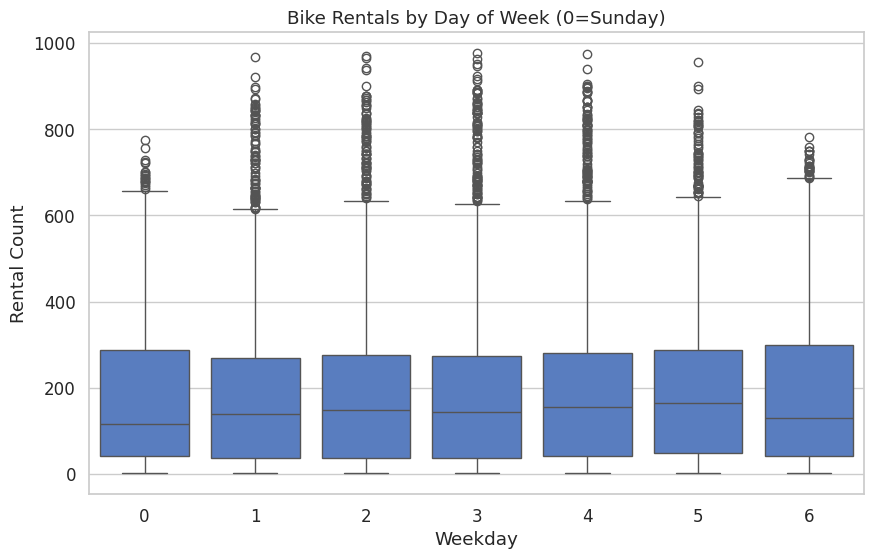

In [10]:
# -------------------------------------------
# 4. Exploratory Data Analysis (EDA)
# -------------------------------------------

# (A) Rental counts by weekday
plt.figure(figsize=(10,6))
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title("Bike Rentals by Day of Week (0=Sunday)")
plt.xlabel("Weekday")
plt.ylabel("Rental Count")
plt.show()

/tmp/ipython-input-2475542112.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='weekday', y='cnt', data=df, estimator=np.mean, ci=None)


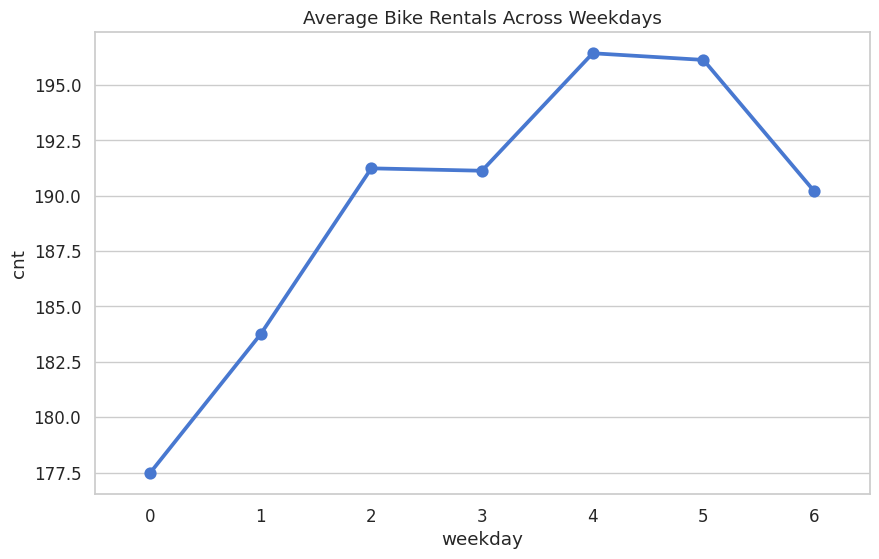

In [11]:
# Average rentals by weekday (line plot)
plt.figure(figsize=(10,6))
sns.pointplot(x='weekday', y='cnt', data=df, estimator=np.mean, ci=None)
plt.title("Average Bike Rentals Across Weekdays")
plt.show()


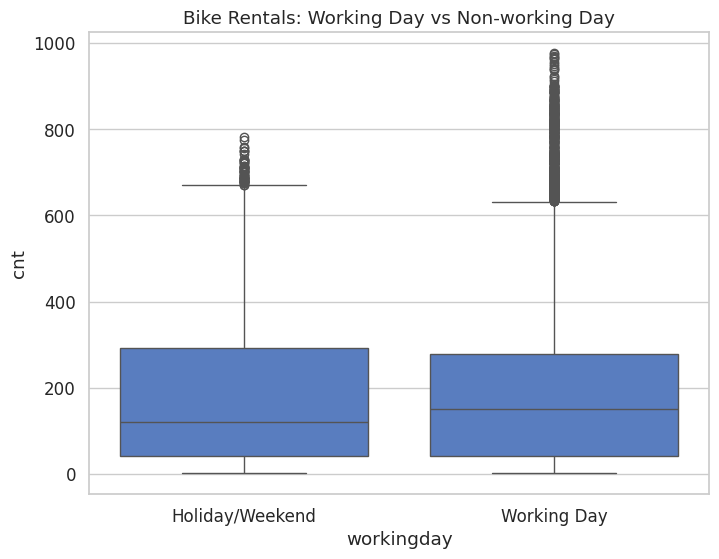

In [12]:

# (B) Working day vs holiday comparison
plt.figure(figsize=(8,6))
sns.boxplot(x='workingday', y='cnt', data=df)
plt.title("Bike Rentals: Working Day vs Non-working Day")
plt.xticks([0,1], ["Holiday/Weekend", "Working Day"])
plt.show()



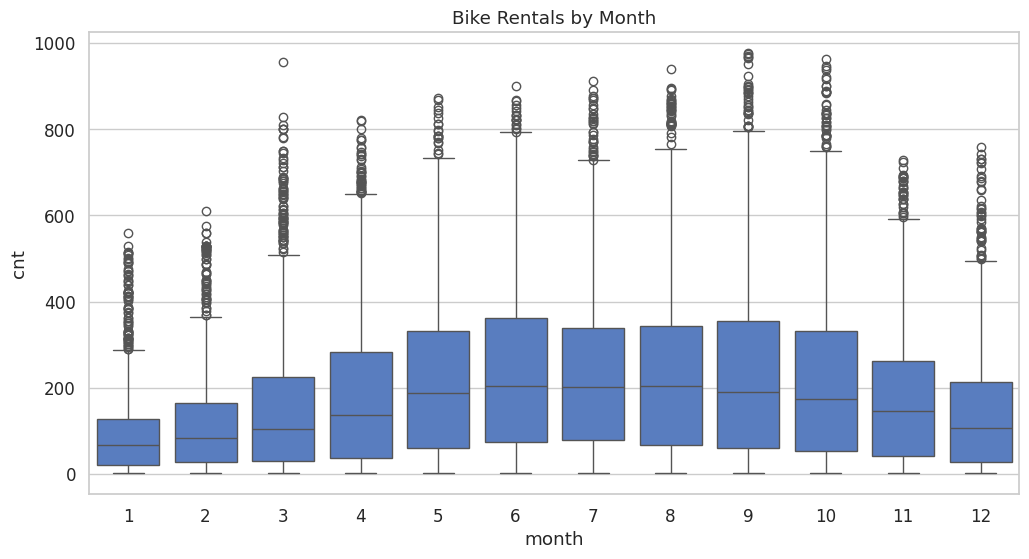

In [13]:
# (C) Rentals by month
df['month'] = pd.to_datetime(df['dteday']).dt.month
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='cnt', data=df)
plt.title("Bike Rentals by Month")
plt.show()


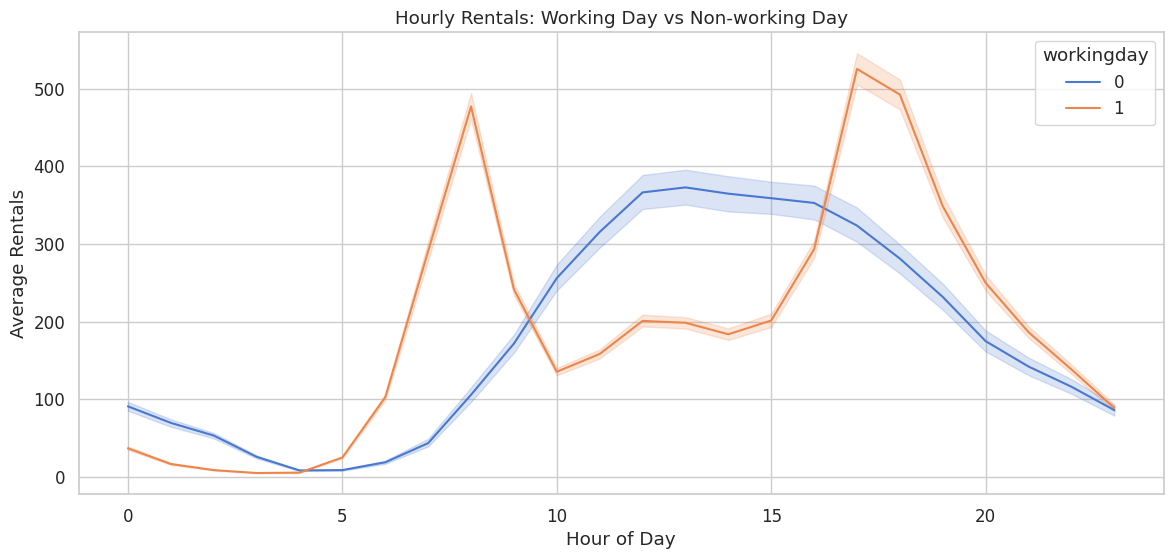

In [14]:

# (D) Hourly pattern by working day
plt.figure(figsize=(14,6))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=df, estimator=np.mean)
plt.title("Hourly Rentals: Working Day vs Non-working Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.show()


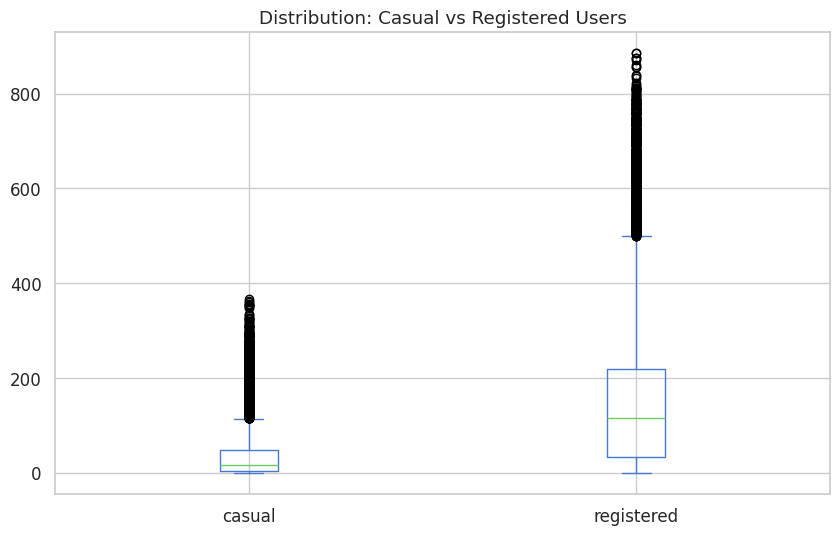

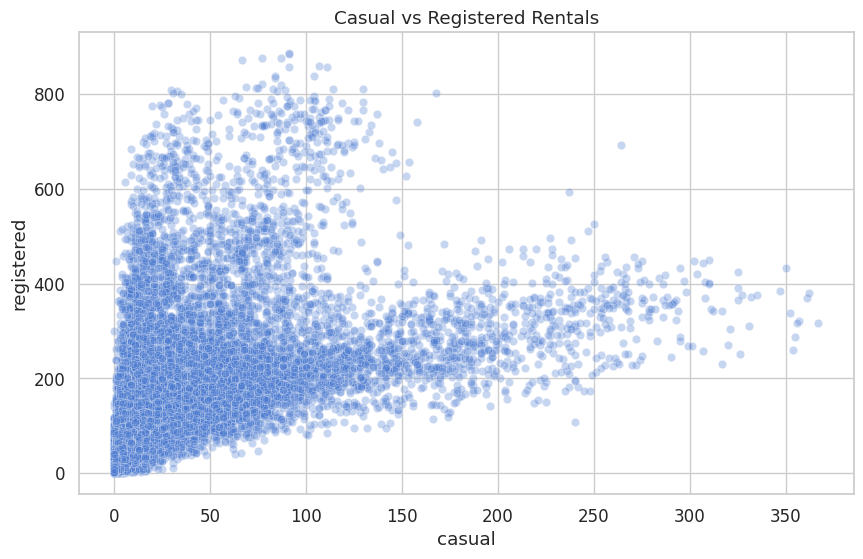

In [15]:

# (E) Registered vs casual users
df[['casual','registered']].plot(kind='box', figsize=(10,6))
plt.title("Distribution: Casual vs Registered Users")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='casual', y='registered', data=df, alpha=0.3)
plt.title("Casual vs Registered Rentals")
plt.show()



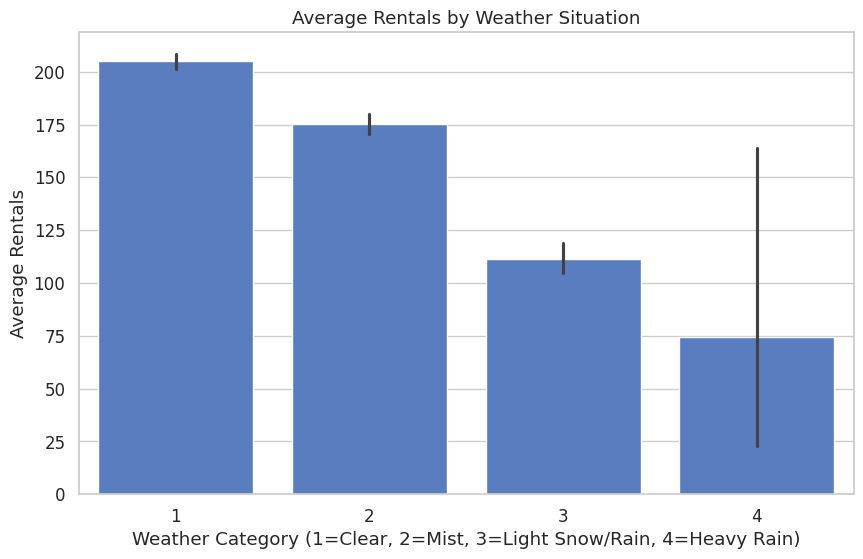

In [16]:

# (F) Weather condition effect
plt.figure(figsize=(10,6))
sns.barplot(x='weathersit', y='cnt', data=df, estimator=np.mean)
plt.title("Average Rentals by Weather Situation")
plt.xlabel("Weather Category (1=Clear, 2=Mist, 3=Light Snow/Rain, 4=Heavy Rain)")
plt.ylabel("Average Rentals")
plt.show()

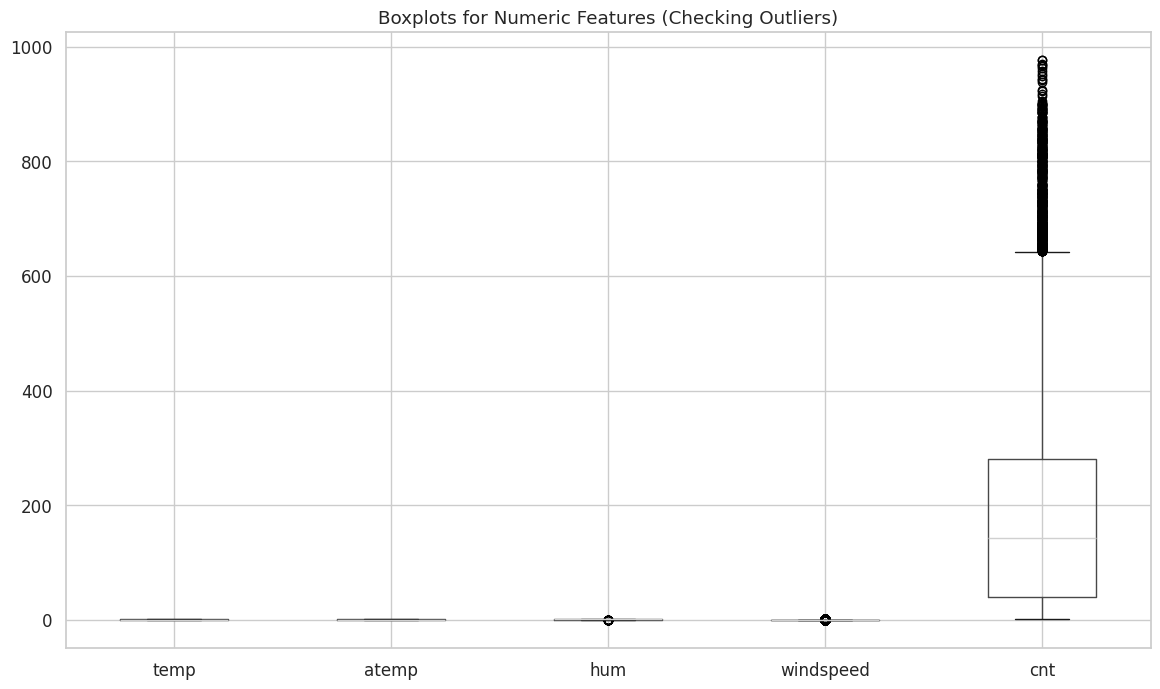

In [17]:

# (G) Outlier detection with boxplots for numeric features
numeric_cols = ['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize=(14,8))
df[numeric_cols].boxplot()
plt.title("Boxplots for Numeric Features (Checking Outliers)")
plt.show()


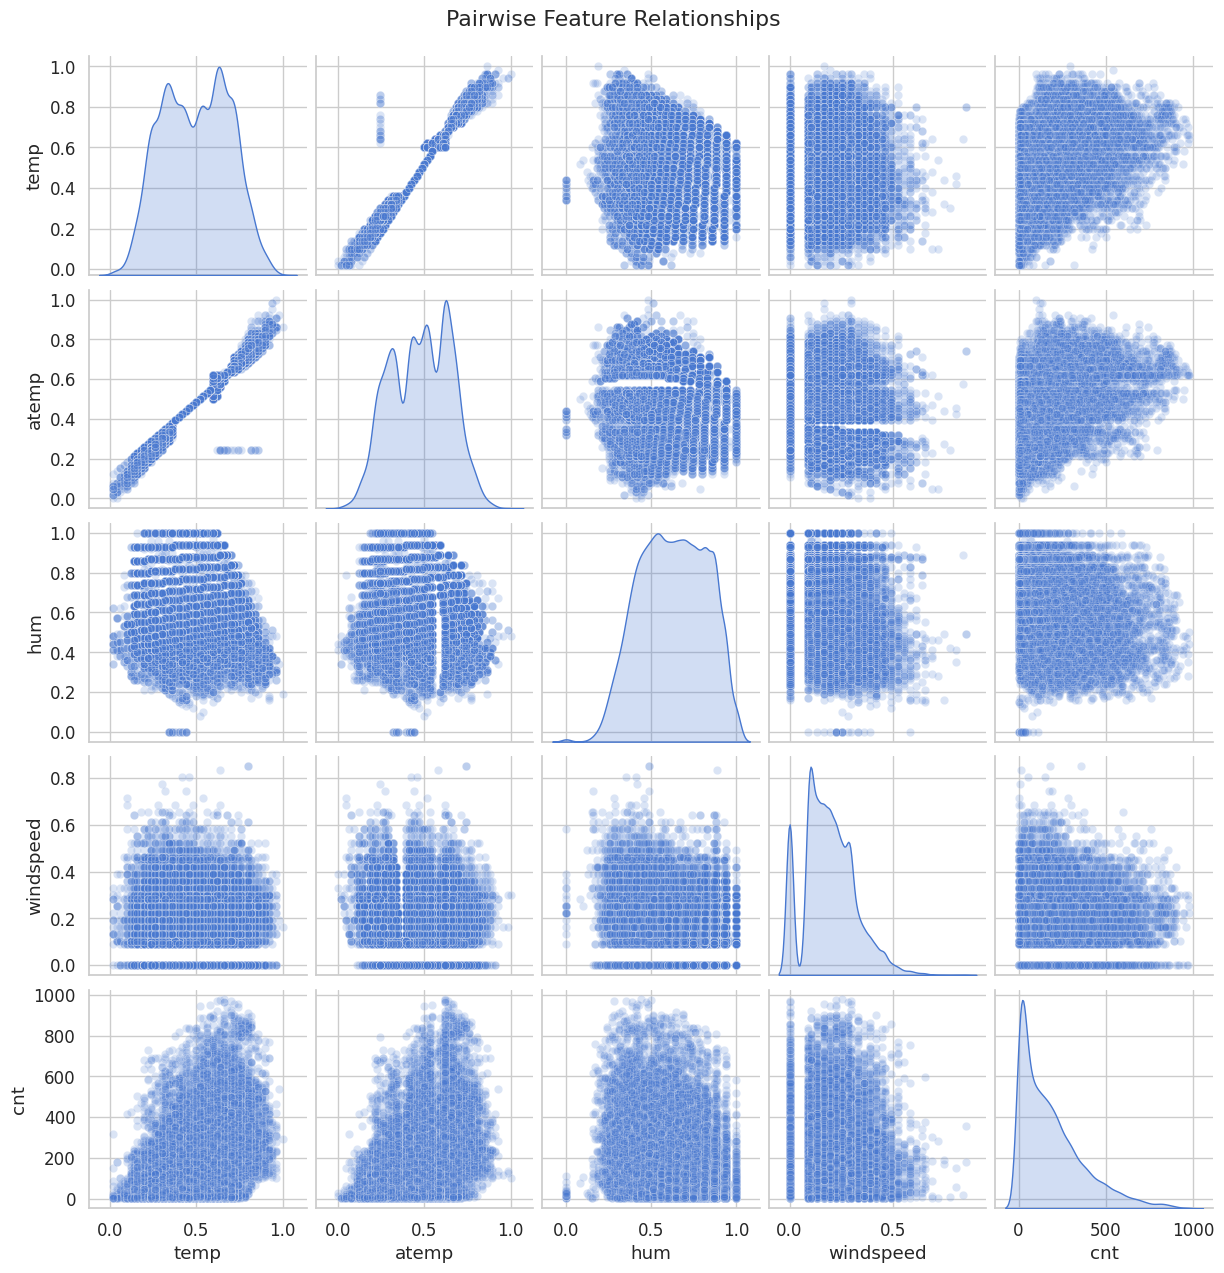

In [18]:

# (H) Pairplot for relationships
sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']], diag_kind="kde", plot_kws={'alpha':0.2})
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


/tmp/ipython-input-841581056.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='hr', y='cnt', hue='season', data=df, estimator=np.mean, ci=None)


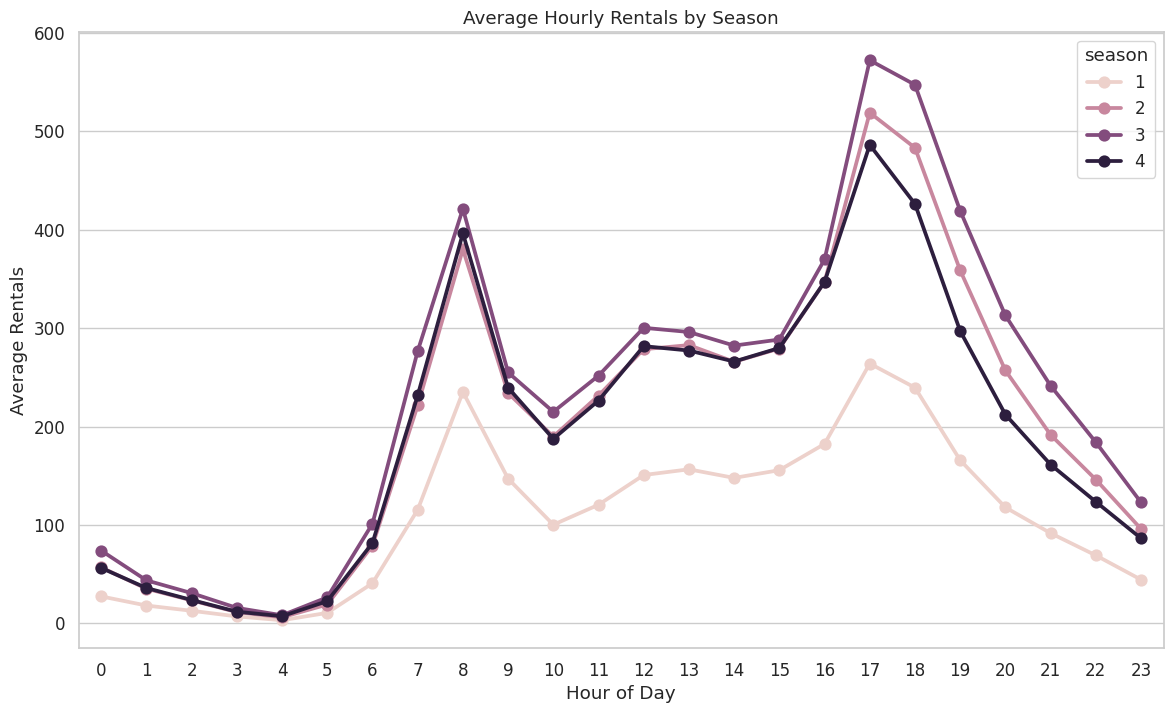

In [19]:

# (I) Distribution of rentals by hour + season (multi-facet)
plt.figure(figsize=(14,8))
sns.pointplot(x='hr', y='cnt', hue='season', data=df, estimator=np.mean, ci=None)
plt.title("Average Hourly Rentals by Season")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.show()



In [20]:
# -------------------------------------------
# Extra Insights to add (Markdown)
# -------------------------------------------
# - Weekday pattern: Rentals are higher on weekdays compared to weekends, especially during commuting hours.
# - Working day effect: Clear difference — working days show sharp peaks at 8 AM and 5 PM, while weekends are more evenly distributed.
# - Seasonal/monthly: Rentals steadily increase in spring/summer, dip in winter.
# - Casual vs registered: Registered users dominate counts, but casual usage is higher on weekends and holidays.
# - Weather: Rentals drop significantly as weather worsens.
# - Outliers: cnt shows occasional extreme spikes; temp/hum fairly clean.
# - Correlation: temp vs cnt shows a strong positive trend, humidity shows slight negative.